<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-75/blob/main/Analisis_EDA_Kmeans_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

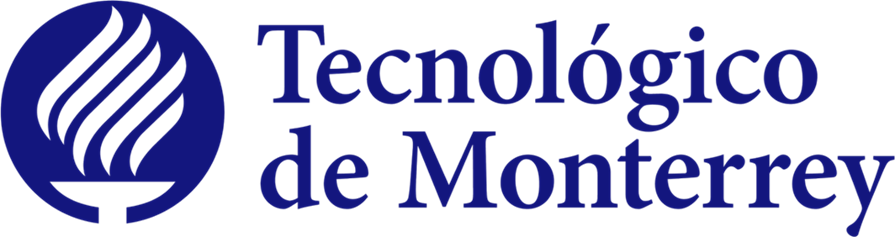

## Ciencia y analítica de datos - Reto Limpieza, análisis, visualización y kmeans
### Profesor: Maria de la Paz Ricco Fernández

###Elber Aguilar Pérez - AO1793568
###Fernando Israel Correa Mendoza A01793869

In [60]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import geopandas as gpd
from scipy.spatial.distance import cdist

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style()

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [3]:
archive = "http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip"
resp = urlopen(archive)
myzip = ZipFile(BytesIO(resp.read()))
myzip.namelist()
myzip.infolist
df = pd.read_csv( myzip.open('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'),encoding='latin-1', sep=',')

In [4]:
df.shape

(1068, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [6]:
# describrimos las variables numericas del dataset
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [7]:
# validamos si hay valores nulos

df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [8]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [9]:
# selecionamos las variables numericas
# excluimos la variable 'SDT_mg/L' 

numerical = ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL','N_NO3_mg/L', 
'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

# creamos un nuevo dataframe con las variables numericas

df_num = df[numerical]
df_num.head()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025


In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   object 
 3   FLUORUROS_mg/L       1068 non-null   object 
 4   DUR_mg/L             1067 non-null   object 
 5   COLI_FEC_NMP/100_mL  1068 non-null   object 
 6   N_NO3_mg/L           1067 non-null   object 
 7   AS_TOT_mg/L          1068 non-null   object 
 8   CD_TOT_mg/L          1068 non-null   object 
 9   CR_TOT_mg/L          1068 non-null   object 
 10  HG_TOT_mg/L          1068 non-null   object 
 11  PB_TOT_mg/L          1068 non-null   object 
 12  MN_TOT_mg/L          1068 non-null   object 
 13  FE_TOT_mg/L          1068 non-null   object 
dtypes: float64(2), object(12)
memory usage: 116.9+ KB


In [11]:
# validamos si hay valores nulos

df_num.isnull().sum()

ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

Vemos que existen valores nulos sobre las variables: 

- SDT_mg/L - Todos sus valores son nulos
- SDT_M_mg/L - 2 valores nulos
- DUR_mg/L - 1 valor nulo
- N_NO3_mg/L - 1 valor nulo

Se observa que las variables númericas seleccionadas aparecen con un tipo de datos object, por lo que se procede a convertirlas a tipo float.


In [12]:
# convertimos las variables object a float, pero primero debemos reemplazar los simbolos de < y > por espacios vacios

df_num = df_num.replace('<', '', regex=True)
df_num = df_num.replace('>', '', regex=True)
# convertimos las variables object a float
df_num = df_num.astype(float)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [13]:
# Ahora si podemos describir las variables numericas

df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1064.0,235.633759,116.874291,26.6400,164.000000,215.527500,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.4000,501.750000,815.000000,1322.750000,18577.000000
SDT_M_mg/L,1066.0,896.101567,2751.530590,25.0000,337.500000,550.400000,916.100000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1067.0,347.938073,359.669452,20.0000,121.194800,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1067.0,4.319759,8.345134,0.0200,0.650294,2.080932,5.201698,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [15]:
# definimos un pipeline para realizar las imputaciones sobre las variables numericas
numerical = ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL','N_NO3_mg/L', 
'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

numeric_transformer = Pipeline(steps=[('impmedian', SimpleImputer(strategy='median'))])

# definimos un pipeline para realizar las imputaciones sobre las variables categoricas


# definimos la transformacion de las variables numericas y categoricas

columnTransformer = ColumnTransformer(transformers=[('num', numeric_transformer, numerical)], remainder='passthrough')


In [16]:
# Separamos nuestras variables predictoras de la variable objetivo

X = df_num
y = df['SEMAFORO']

X.shape

(1068, 14)

In [17]:
# ejecutar el pipeline para imputar los datos
df_num_clean = columnTransformer.fit_transform(X)

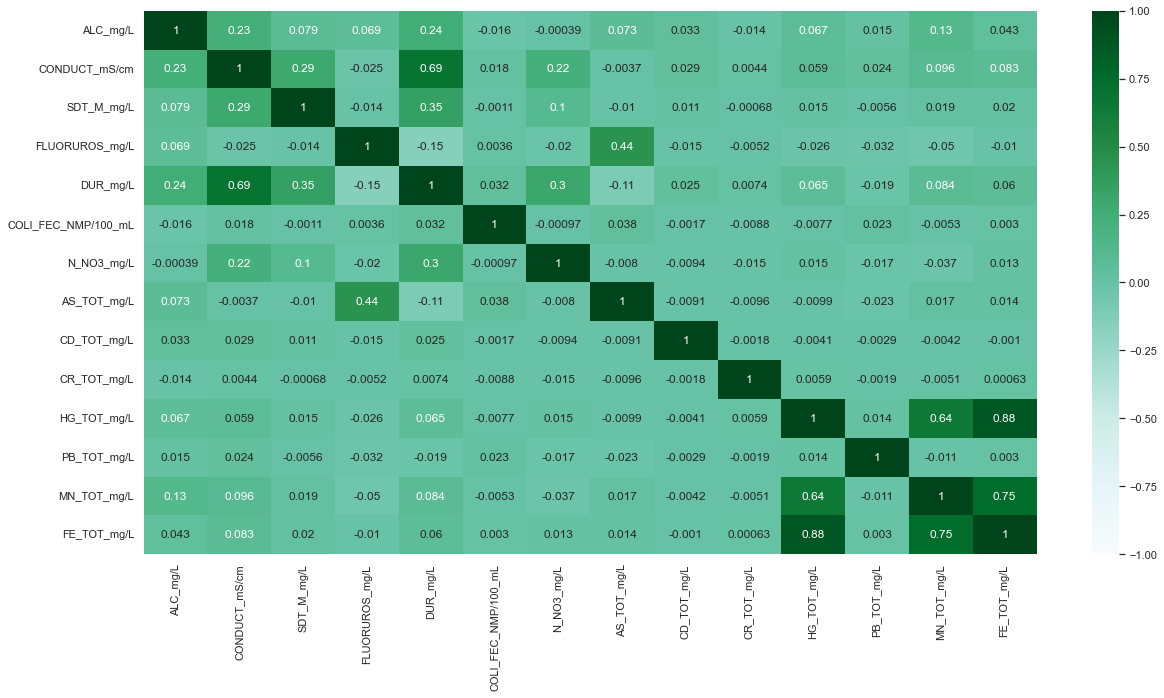

In [18]:
# creamos una matriz de correlacion 

# Calculamos matriz de correlación entre las variables de entrada 

sns.set(rc={'figure.figsize':(20,10)})

sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BuGn')
plt.show()


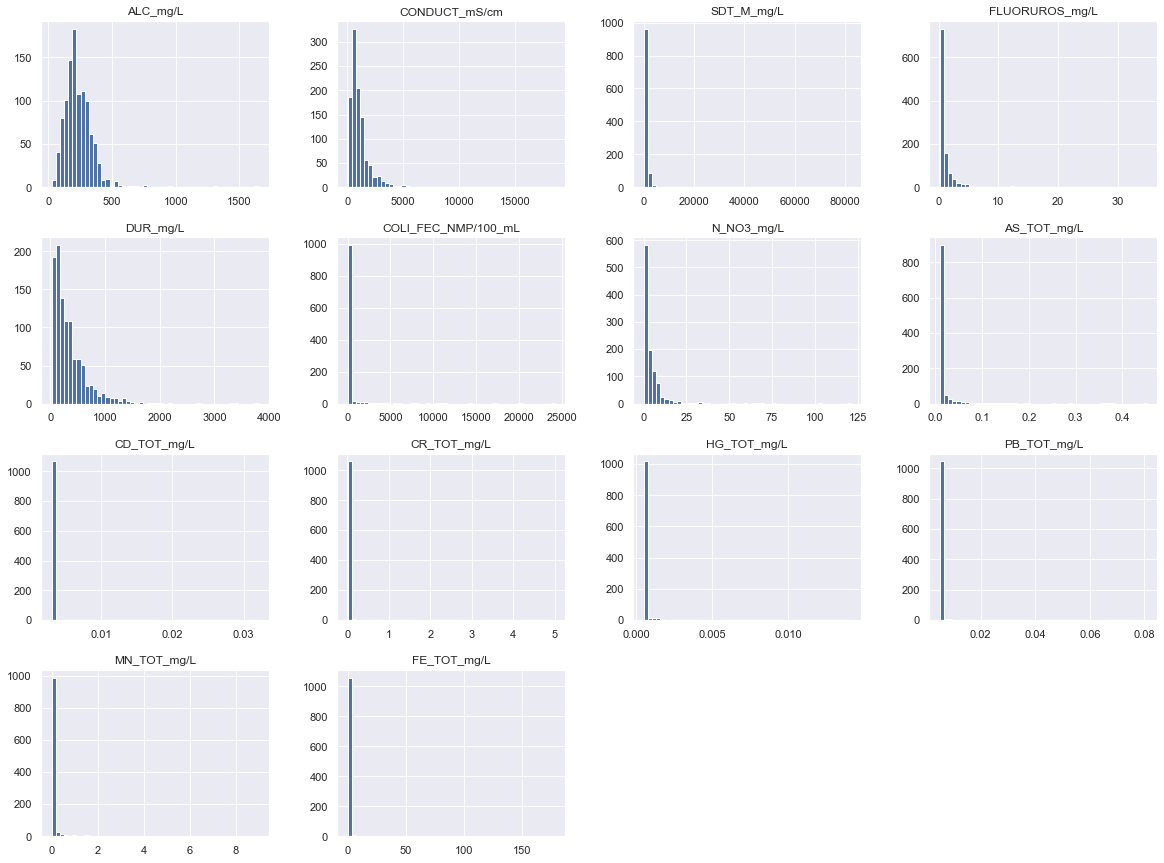

In [19]:
# Vemos las distribuciones de las variables

X.hist(bins=50, figsize=(20,15))
plt.show()

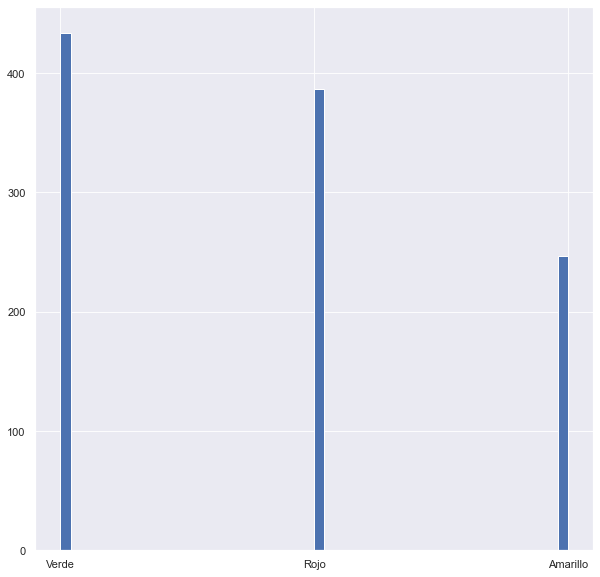

In [20]:
# Vamos la distribucion de la variable objetivo
y.hist(bins=50, figsize=(10,10))
plt.show()

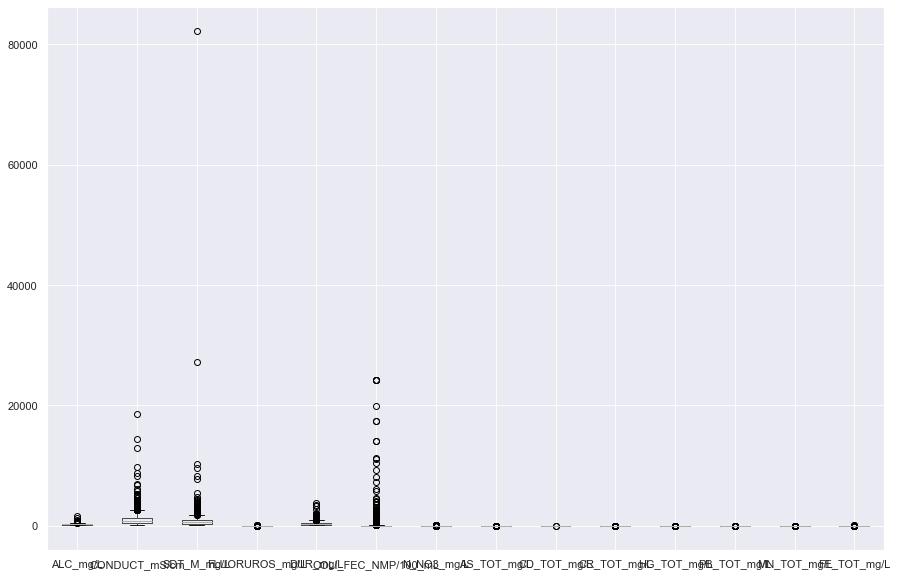

In [23]:
# Definimos un boxplot para ver la distribucion de las variables de entrada
X.boxplot(figsize=(15,10))
plt.show()

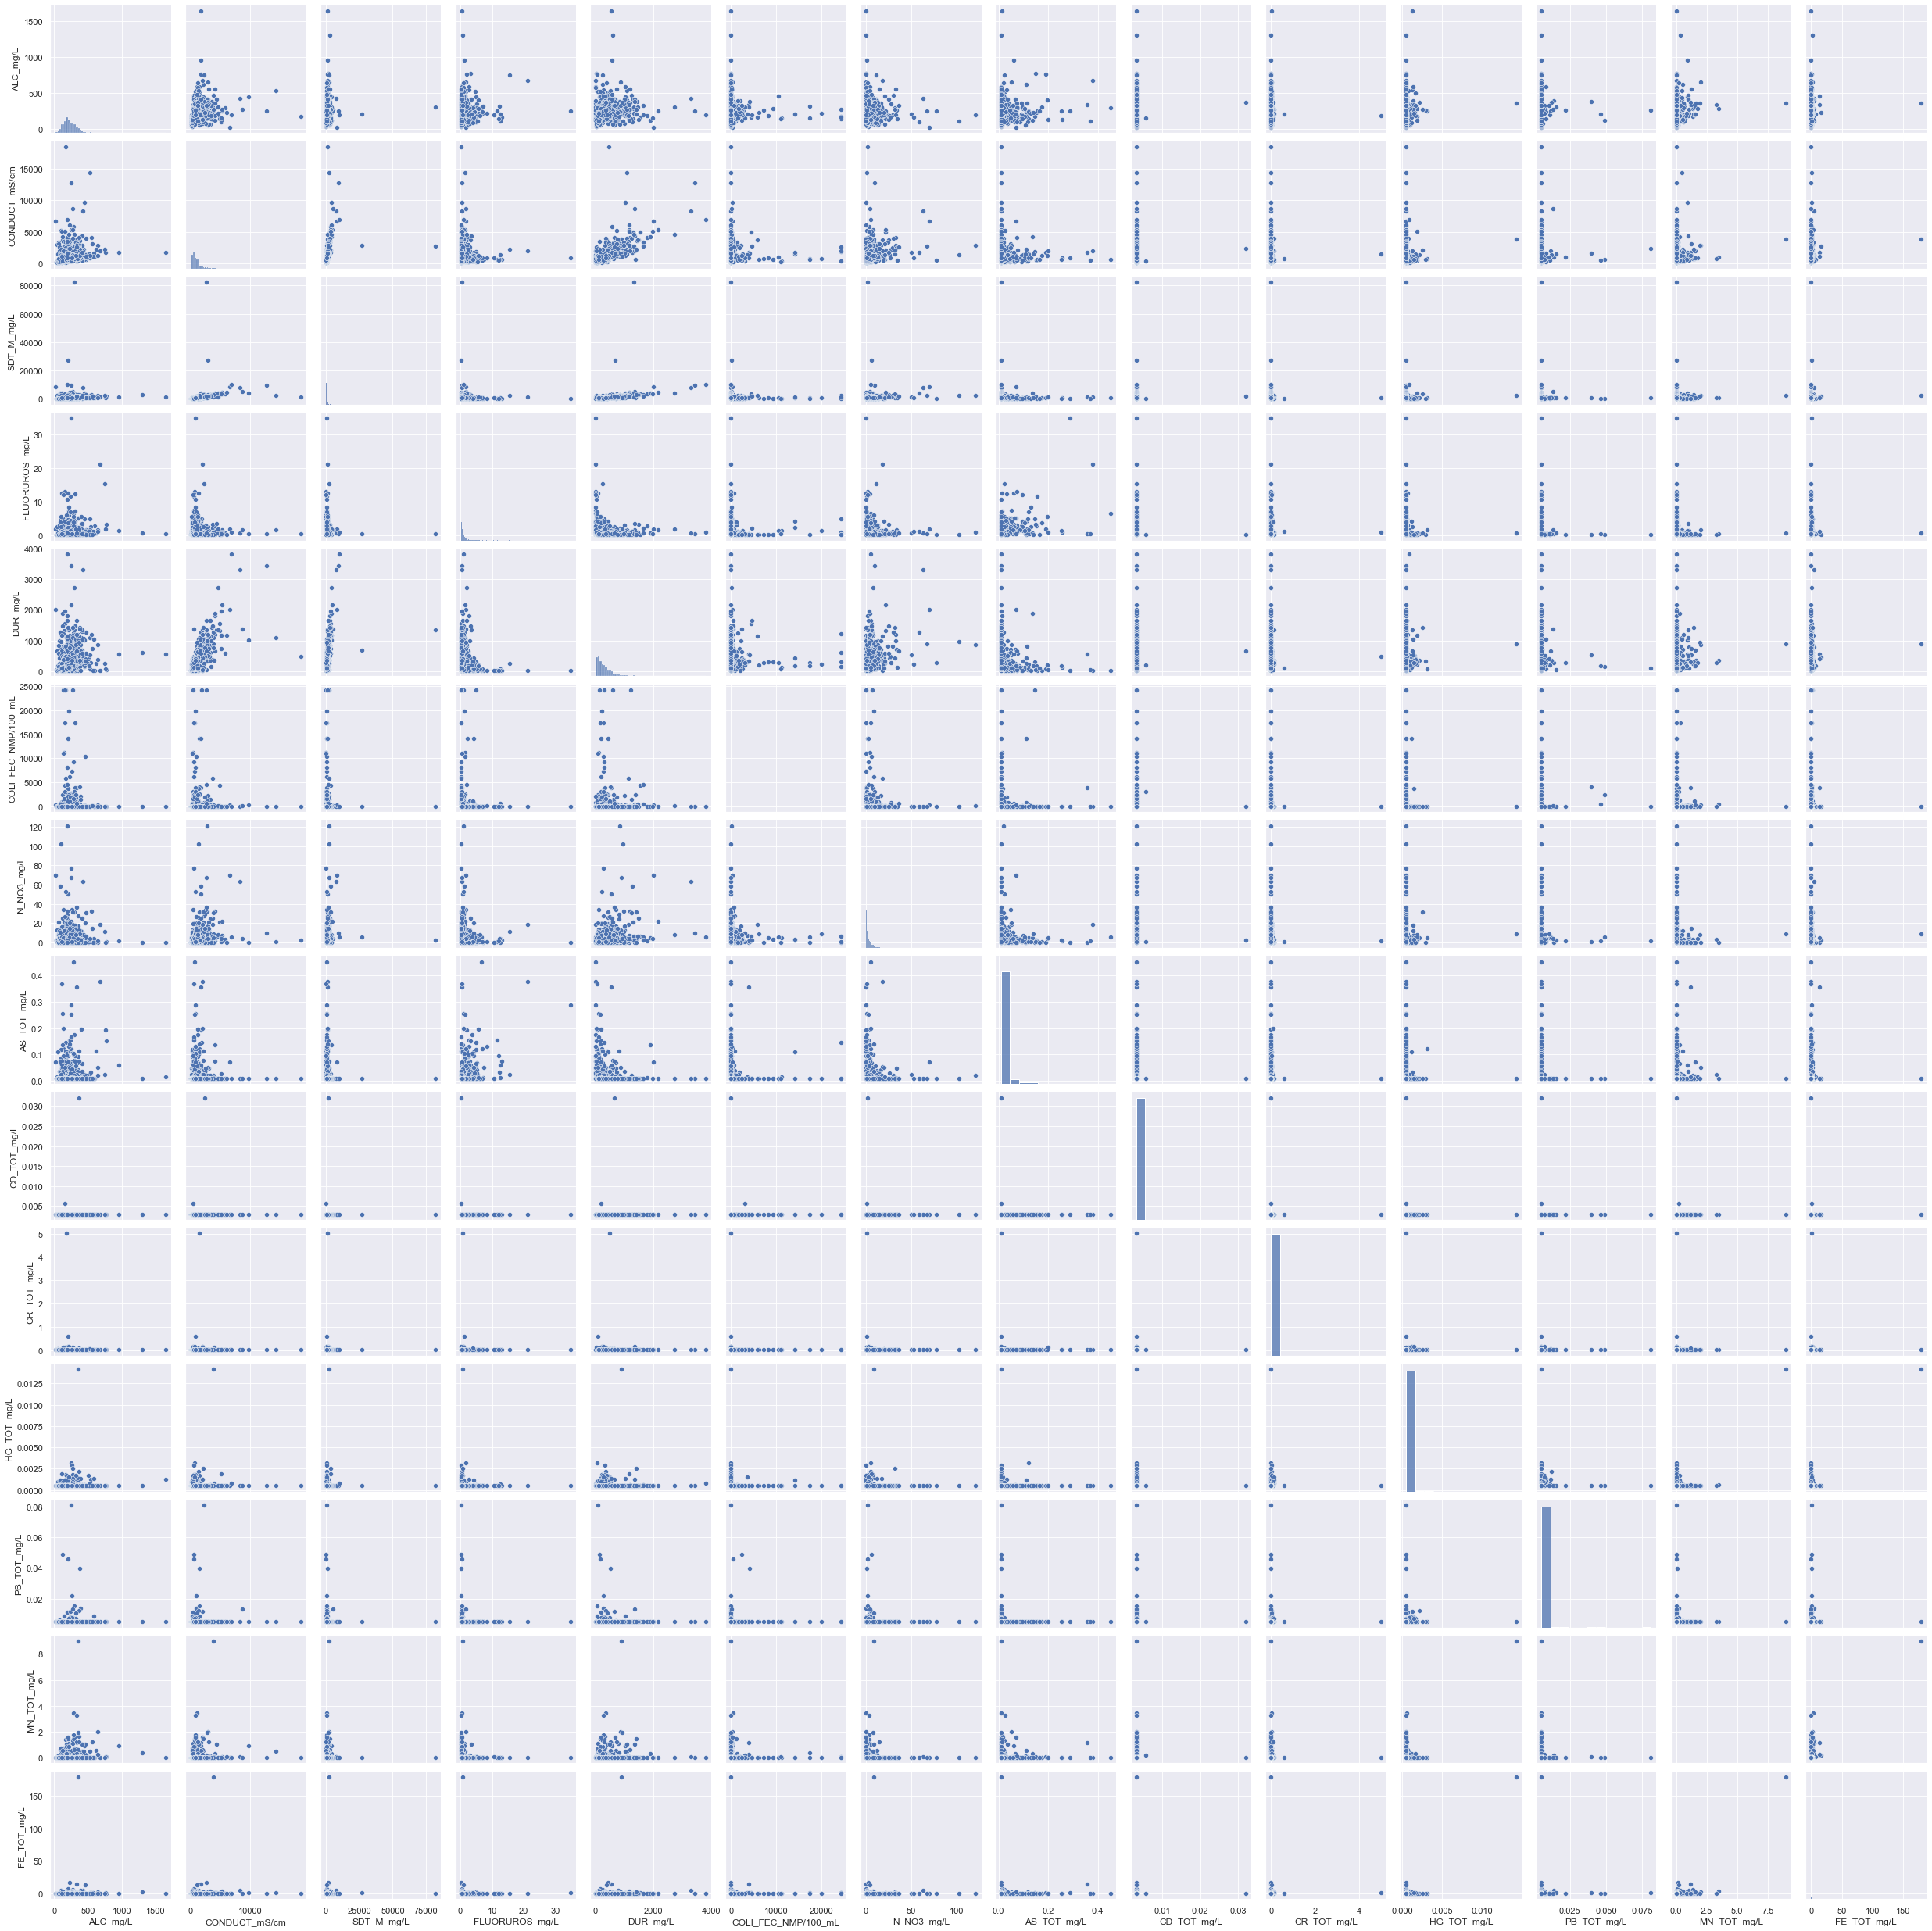

In [24]:
# Creamos un scater plot para ver la relacion entre las variables de entrada

sns.pairplot(X)

### Iniciamos la implementación del algoritmo Kmeans

In [25]:
# definimos variables de coordenadas sobre el dataset
df_coord = df[['LATITUD', 'LONGITUD']]

df_coord['coordenadas'] = list(zip(df_coord.LONGITUD, df_coord.LATITUD))

df_coord['coordenadas'] = df_coord['coordenadas'].apply(Point)

gdf = gpd.GeoDataFrame(df_coord, geometry='coordenadas')

gdf.head()

/var/folders/zy/x58smq3x1rs8mqsnpkq1tx8r0000gn/T/ipykernel_92634/2999790326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coord['coordenadas'] = list(zip(df_coord.LONGITUD, df_coord.LATITUD))
/var/folders/zy/x58smq3x1rs8mqsnpkq1tx8r0000gn/T/ipykernel_92634/2999790326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coord['coordenadas'] = df_coord['coordenadas'].apply(Point)


,LATITUD,LONGITUD,coordenadas
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)


In [26]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: coordenadas


In [27]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


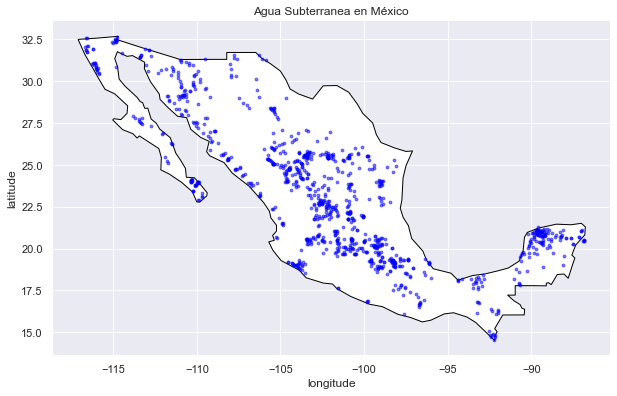

In [28]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5,markersize=8)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Agua Subterranea en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [29]:
# Calculamos el número de clusters a utilizar en el modelo de clustering

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

Y = df_coord[['LATITUD']]
X = df_coord[['LONGITUD']]

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [30]:

mapping1

{1: 5.036846882979844,
 2: 3.8514926567141683,
 3: 1.967033314250327,
 4: 1.346271635861406,
 5: 1.1310043107634369,
 6: 0.9235223283454158,
 7: 0.8174445500303265,
 8: 0.7085645986914703,
 9: 0.6377473673463672}

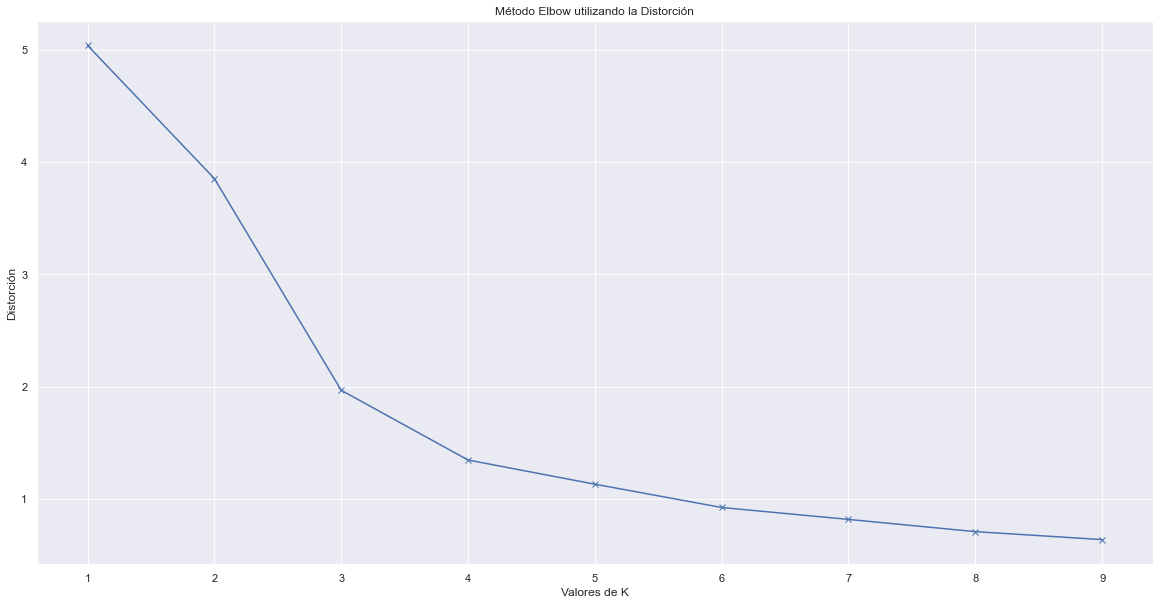

In [31]:
# Visualizamos la gráfica de nuestras iteraciones 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorción')
plt.title('Método Elbow utilizando la Distorción')
plt.show()

- Utilizamos el método de elbow para determinar el número de clusters óptimo, en este caso se selecciona 4 clusters.
- Se realiza el análisis de kmeans con 4 clusters.
- Se grafica el resultado de los clusters obtenidos.

In [32]:
# Implementamos el modelo de clustering con el número de clusters obtenido en el método Elbow

k = 4
X = df_coord[["LONGITUD", "LATITUD"]]

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [33]:
# labels de los clusters

kmeans.labels_

array([3, 3, 1, ..., 1, 1, 1], dtype=int32)

In [34]:
# obtenemos los centroides 

c = kmeans.cluster_centers_

c_df = pd.DataFrame(c)
c_df["coordenadas"] = list(zip(c_df[0], c_df[1]))
c_df["coordenadas"] = c_df["coordenadas"].apply(Point)

gdf_c = gpd.GeoDataFrame(c_df, geometry="coordenadas") #Geopandas, necesita  puntos coordenadas para 
gdf_c

,0,1,coordenadas
0,-90.092716,19.650263,POINT (-90.09272 19.65026)
1,-103.606321,24.710744,POINT (-103.60632 24.71074)
2,-111.445371,28.734017,POINT (-111.44537 28.73402)
3,-100.188942,20.196269,POINT (-100.18894 20.19627)


In [35]:
from geopy.geocoders import Nominatim

centers = kmeans.cluster_centers_
geolocator = Nominatim(user_agent="kmeans_app")
locations = []
for i in range(len(centers)):
  location = geolocator.reverse(str(centers[i][1]) + "," + str(centers[i][0]))
  locations.append(location.address)
  print(f'Location {i}: {location.address}')

Location 0: Municipio de Campeche, Campeche, México
Location 1: Doce de Deciembre, Cuencamé, Durango, México
Location 2: Granja el Charro, Hermosillo, Sonora, México
Location 3: Epitacio Huerta, Michoacán, 61015, México


In [36]:
# Imprimimos los valores de nuestra variable objetivo

y.value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [37]:
df_coord

,LATITUD,LONGITUD,coordenadas
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)
...,...,...,...
1063,24.76036,-99.54191,POINT (-99.54191 24.76036)
1064,24.78280,-99.70099,POINT (-99.70099 24.78280)
1065,25.55197,-99.82249,POINT (-99.82249 25.55197)
1066,24.80118,-100.32683,POINT (-100.32683 24.80118)


In [38]:
# Creamos un nuevo dataframe con las coordenadas y los labels de los clusters

y_df = pd.DataFrame(y)

# Creamos una nueva columna en el dataframe con los labels de los clusters 

y_df["SEMAPHORE"] = y_df['SEMAFORO'].replace(to_replace=['Verde', 'Amarillo', 'Rojo'], value=['Green', 'Yellow', 'Red'])

y_df 

,SEMAFORO,SEMAPHORE
0,Verde,Green
1,Verde,Green
2,Rojo,Red
3,Verde,Green
4,Rojo,Red
...,...,...
1063,Rojo,Red
1064,Rojo,Red
1065,Rojo,Red
1066,Verde,Green


In [39]:
# unimos los dataframes

df_coord_final = pd.concat([df_coord, y_df['SEMAPHORE']], axis=1)
df_coord_final

,LATITUD,LONGITUD,coordenadas,SEMAPHORE
0,22.20887,-102.02210,POINT (-102.02210 22.20887),Green
1,21.99958,-102.20075,POINT (-102.20075 21.99958),Green
2,22.36685,-102.28801,POINT (-102.28801 22.36685),Red
3,22.18435,-102.29449,POINT (-102.29449 22.18435),Green
4,23.45138,-110.24480,POINT (-110.24480 23.45138),Red
...,...,...,...,...
1063,24.76036,-99.54191,POINT (-99.54191 24.76036),Red
1064,24.78280,-99.70099,POINT (-99.70099 24.78280),Red
1065,25.55197,-99.82249,POINT (-99.82249 25.55197),Red
1066,24.80118,-100.32683,POINT (-100.32683 24.80118),Green


In [40]:
#df_coord_final = df_coord
# Agregamos la columna de los labels de los clusters
#  
df_coord_final['kmeans'] = kmeans.labels_

df_coord_final

,LATITUD,LONGITUD,coordenadas,SEMAPHORE,kmeans
0,22.20887,-102.02210,POINT (-102.02210 22.20887),Green,3
1,21.99958,-102.20075,POINT (-102.20075 21.99958),Green,3
2,22.36685,-102.28801,POINT (-102.28801 22.36685),Red,1
3,22.18435,-102.29449,POINT (-102.29449 22.18435),Green,1
4,23.45138,-110.24480,POINT (-110.24480 23.45138),Red,2
...,...,...,...,...,...
1063,24.76036,-99.54191,POINT (-99.54191 24.76036),Red,1
1064,24.78280,-99.70099,POINT (-99.70099 24.78280),Red,1
1065,25.55197,-99.82249,POINT (-99.82249 25.55197),Red,1
1066,24.80118,-100.32683,POINT (-100.32683 24.80118),Green,1


In [41]:
df_coord_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LATITUD      1068 non-null   float64 
 1   LONGITUD     1068 non-null   float64 
 2   coordenadas  1068 non-null   geometry
 3   SEMAPHORE    1068 non-null   object  
 4   kmeans       1068 non-null   int32   
dtypes: float64(2), geometry(1), int32(1), object(1)
memory usage: 37.7+ KB


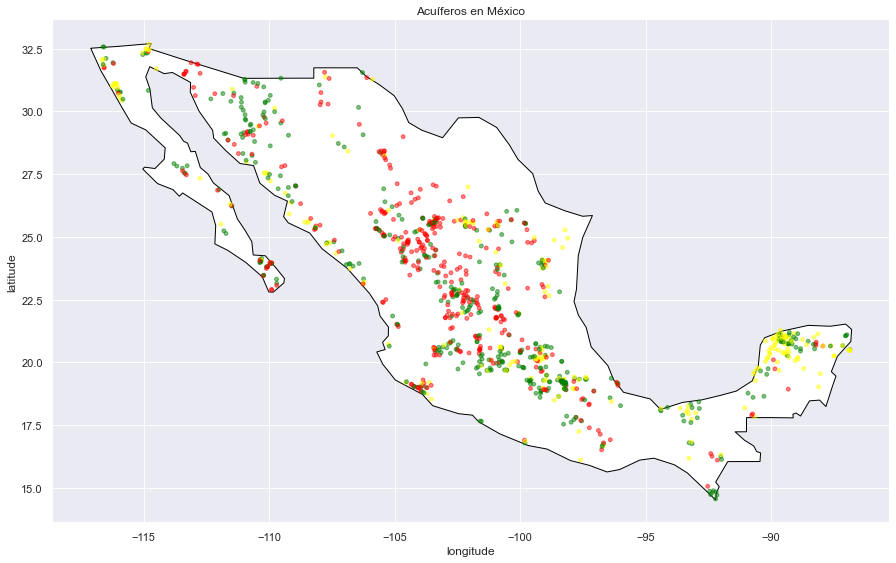

In [42]:
# Distribución de los acuíferos de acuerdo con el semaosforo

fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

gdf.plot(ax=gax, color=df_coord_final['SEMAPHORE'], alpha = 0.5,markersize=15) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuíferos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

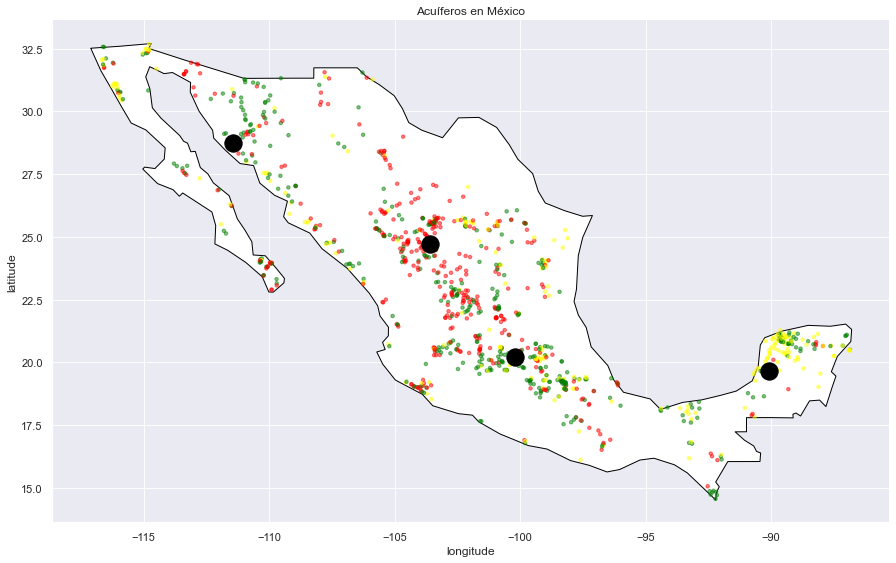

In [43]:
# Creamos un nuevo dataframe con las coordenadas y los labels de los clusters

fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

gdf.plot(ax=gax, color=df_coord_final['SEMAPHORE'], alpha = 0.5,markersize=12)
gdf_c.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuíferos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [44]:
kmeans.labels_

array([3, 3, 1, ..., 1, 1, 1], dtype=int32)

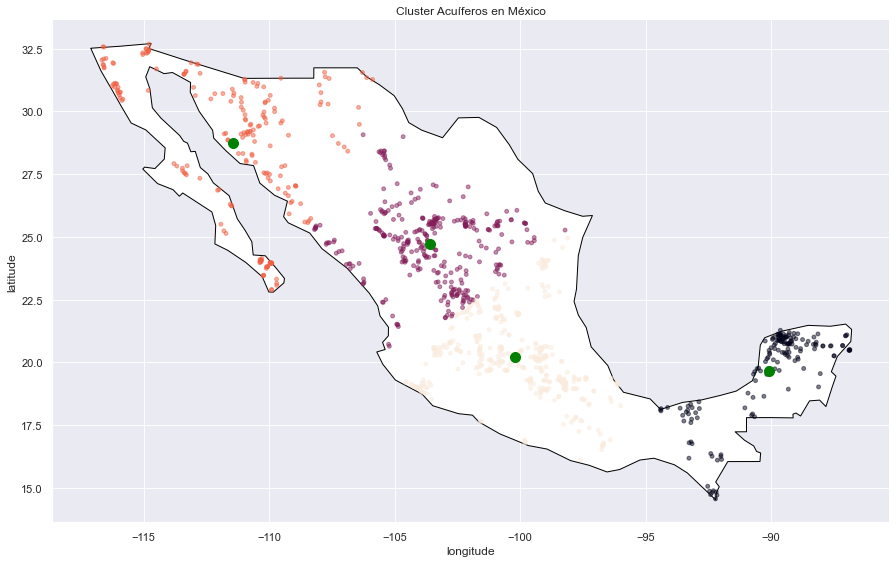

In [45]:
# Creamos un nuevo dataframe con las coordenadas y los labels de los clusters
gdf_g = gpd.GeoDataFrame(df_coord_final, geometry="coordenadas")
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais


gdf_g.plot(ax=gax,column="kmeans" ,markersize=15, alpha = 0.5) 
gdf_c.plot(ax=gax, color='green', markersize=100, alpha = 1) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cluster Acuíferos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [46]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [47]:
df_coord

,LATITUD,LONGITUD,coordenadas
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)
...,...,...,...
1063,24.76036,-99.54191,POINT (-99.54191 24.76036)
1064,24.78280,-99.70099,POINT (-99.70099 24.78280)
1065,25.55197,-99.82249,POINT (-99.82249 25.55197)
1066,24.80118,-100.32683,POINT (-100.32683 24.80118)


In [48]:
df_coord_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LATITUD      1068 non-null   float64 
 1   LONGITUD     1068 non-null   float64 
 2   coordenadas  1068 non-null   geometry
 3   SEMAPHORE    1068 non-null   object  
 4   kmeans       1068 non-null   int32   
dtypes: float64(2), geometry(1), int32(1), object(1)
memory usage: 37.7+ KB


In [49]:
# obtenemos el numero de acuíferos por cluster

data = df_coord_final['kmeans'].value_counts()
label = {0:'Cluster 0', 1:'Cluster 1', 2:'Cluster 2', 3:'Cluster 3'}
data.index = data.index.map(label)
data

Cluster 3    369
Cluster 1    331
Cluster 2    206
Cluster 0    162
Name: kmeans, dtype: int64

Text(0, 0.5, 'Acuíferos')

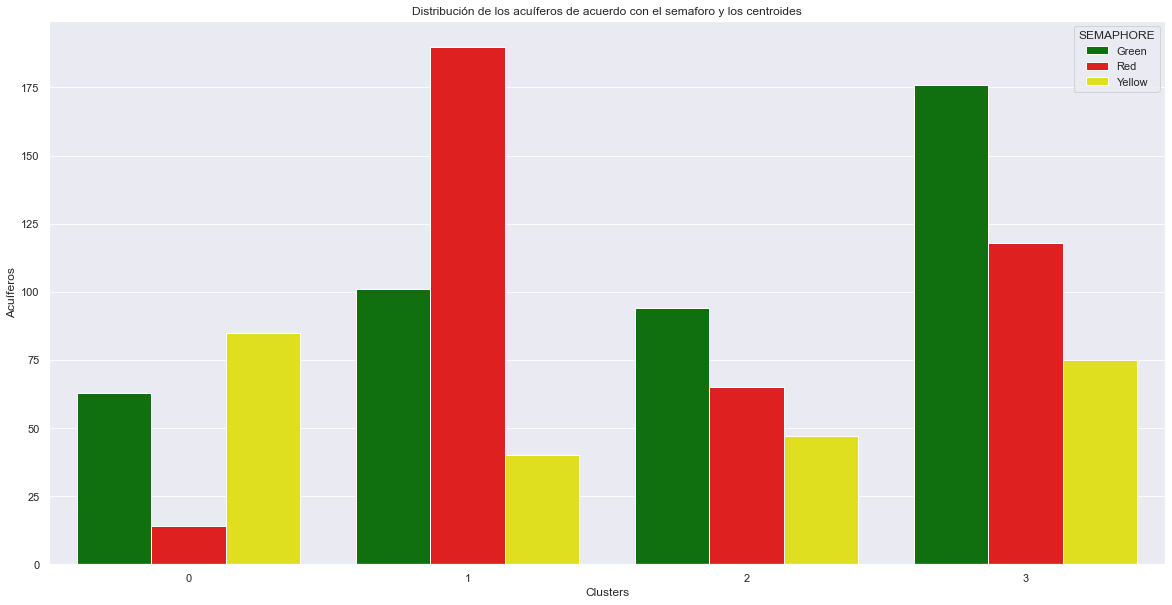

In [50]:
# creamos un dataframe agregando una columna 
sns.set(rc={'figure.figsize':(20,10)})
# Create an array with the colors you want to use
colors = ['green', 'red', 'yellow']
# Set your custom color palette
#y_axis = df_graph['SEMAPHORE'].value_counts()

sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(data = df_coord_final, x = 'kmeans', hue = 'SEMAPHORE')
ax.set_title('Distribución de los acuíferos de acuerdo con el semaforo y los centroides')
ax.set_xlabel('Clusters')
ax.set_ylabel('Acuíferos')


## Conclusiones

- Se observa que los clusters con mayor número de registros son los clusters 1 y 3, mientras que los clusters 0 y 2 tienen menor número de registros.
- Se observa que los clusters 0 y 2 tienen valores de pH y DBO_mg/L similares, mientras que los clusters 1 y 3 tienen valores de pH y DBO_mg/L diferentes.
- El cluster 1 en Cuencamé, Durango tiene una mayor concentración de acuiferos con semaforo en rojo, mientras que el cluster 3 en Epitacio Huerta, Michoacán tiene una mayor concentración de acuiferos con semaforo en verde.





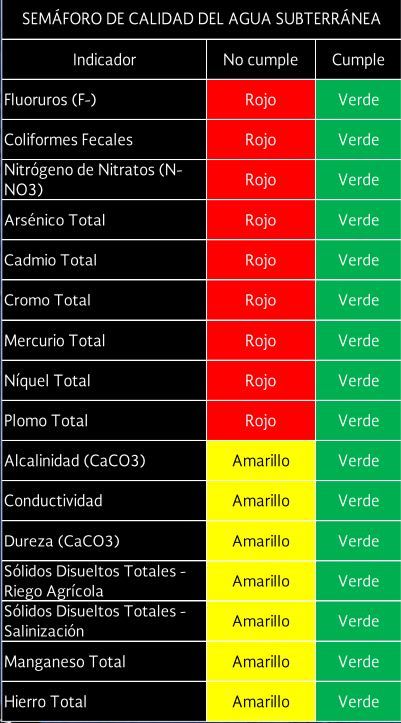

### Reto-> Entrega 2 - Clasificación-ensambles 

**Selecciona tus variables independientes X y dependiente Y (semáforo)**

In [80]:
X = pd.DataFrame(df_num_clean) #datos de entrada
y = df['SEMAFORO'] #datos de salida

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


**Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

In [81]:
from sklearn import preprocessing

# Creamos el objeto LabelEncoder
le = preprocessing.LabelEncoder()

# Convertimos las etiquetas de la columna 'SEMAFORO' a valores numéricos
y = le.fit_transform(y)
list(le.classes_)

['Amarillo', 'Rojo', 'Verde']

In [82]:
# Analisis balance de clases sobre la variable de salida 

y = pd.DataFrame(y)
y.value_counts() # Verificamos que la variable de salida este balanceada

2    434
1    387
0    247
dtype: int64

In [83]:
X.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

**Divición de datos en entrenamiento y prueba**

In [84]:
# dividimos los datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((854, 14), (214, 14), (854, 1), (214, 1))

#### Decision Tree

In [93]:
from sklearn import tree
import pydotplus 
from IPython.display import Image
from graphviz import Digraph

# Creamos el objeto de clasificación

clf = tree.DecisionTreeClassifier( max_depth=4,
                                 random_state=42, 
                                 class_weight='balanced')

# Entrenamos el modelo

clf = clf.fit(X_train, y_train)

# Predecimos los valores de salida

y_pred = clf.predict(X_test)

# exportar el modelo a archivo .dot
# 
dot_data = tree.export_graphviz(clf,
                         out_file= None,
                         max_depth = 4,
                         impurity = True,
                         feature_names = X_train.columns,
                         class_names = ['Verde','Rojo','Amarllo'],
                         rounded = True,
                         filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



InvocationException: GraphViz's executables not found

In [91]:
!pip install graphviz

     |████████████████████████████████| 47 kB 1.8 MB/s eta 0:00:011
